<a href="https://colab.research.google.com/github/Jeremy-Thompson33/Take-It-Outdoors-Analysis/blob/main/TIO_Analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take It Outdoors | 2024 Analysis
#### Analyzing rental and booking data from the past year in order to improve business practices and decisions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_link24 = 'https://raw.githubusercontent.com/Jeremy-Thompson33/Take-It-Outdoors-Analysis/refs/heads/main/TIO_Bookings_2024.csv'
data_link23 = 'https://raw.githubusercontent.com/Jeremy-Thompson33/Take-It-Outdoors-Analysis/refs/heads/main/TIO_Bookings_2023.csv'
df = pd.read_csv(data_link24)
df23 = pd.read_csv(data_link23)

## Cleaning

Add full name column.

In [3]:
df['Full Name'] = df['First Name'].apply(lambda x: x.lower()) + ' ' + df['Last Name'].apply(lambda x: str(x).lower())

Convert to datetime columns.

In [4]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

Make day of week columns.

In [5]:
df['Day Of Week'] = df['Activity Date'].dt.day_name()
df['Day Of Week Number'] = df['Activity Date'].dt.day_of_week

Remove test bookings.

In [6]:
test_codes = ['noahtest', 'KARATEST']
df = df[~df['Promotion Code'].isin(test_codes)]

Make dataframe that excludes cancelled bookings.

In [7]:
df_no_cancels = df[df['Status'] != "canceled"]

Make dataframe with no repeated bookings (includes all activities).

In [8]:
unique_columns = ['Booking ID', 'Full Name', 'Tickets / Items', 'Activity Date']
all_unique_bookings = (
    df_no_cancels[~df_no_cancels['Tickets / Items'].str.contains('Person|Refund', regex=True)]
    .drop_duplicates(subset=unique_columns)
)

Make dataframe with no repeated rental bookings and no cancels.


In [9]:
main_trip_unique_bookings = (
    df_no_cancels[df_no_cancels['Activity / Add-On'].str.contains("Mile Self-Guided Trip")]
    .loc[~df_no_cancels['Tickets / Items'].str.contains('Person|Refund', regex=True)]
    .drop_duplicates(subset=unique_columns)
)

Make a dataframe that contains unique individuals.

In [10]:
pd.unique(df['Full Name']).size

524

Bar graph of most frequent paddlers in 2024.

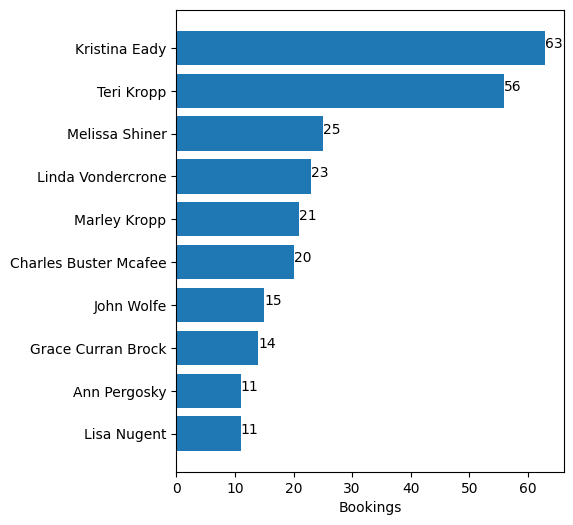

In [54]:
# Get value counts for top paddlers
top_paddlers_series = all_unique_bookings['Full Name'].value_counts().head(10)

# Convert series to dataframe
top_paddlers = (
    pd.DataFrame({'Name':top_paddlers_series.index, 'Count':top_paddlers_series.values})
    .sort_values(by='Count', ascending=True)
)

# Data
x = top_paddlers['Name'].str.title()
y = top_paddlers['Count']

# Plot
plt.figure(figsize=(5, 6))
plt.barh(x, y)

# Design
plt.xlabel('Bookings')

# Values on bars
for index, value in enumerate(top_paddlers['Count']):
    plt.text(value, index, str(value))

## Net Revenue by Activity (2024)
#### How much money did each activity bring in in 2024?

Net Revenue 2024

In [12]:
df['Your Net Revenue'].sum()

44109.299999999996

Net revenue for each activity (includes cancellations because not all cancellations got refunded).


In [13]:
activity_nets = df.groupby(['Activity / Add-On'])['Your Net Revenue'].sum()

activity_nets.sort_values(ascending=False)

,Your Net Revenue
Activity / Add-On,
8 Mile Self-Guided Trip,16897.87
4 Mile Self-Guided Trip,12667.33
WEDNESDAY NIGHT PADDLE,2287.08
Middle Susquehanna Overnighter,1925.94
Pop-Up Paddle,1143.78
Upper Schuylkill Spring River Trip,903.66
2024 Sly Fox Spree Paddle,602.97
Susquehanna Dauphin Narrows,587.45
"Group event, organized by Chris Drucquer",562.19


## Activity Type Popularity
#### What paddling trips (4-mile, 8-mile, or 12-mile) are most popular?


Count number of unique bookings (only includes bookings for 4-mile, 8-mile, and 12-mile trips).


In [14]:
print(f"Total Booking Rows: {df['Booking ID'].size}\nUnique Main Trip Booking IDs: {main_trip_unique_bookings['Booking ID'].size}")

Total Booking Rows: 2151
Unique Main Trip Booking IDs: 488


Number of bookings for each activity type

In [15]:
activity_counts = main_trip_unique_bookings.value_counts('Activity / Add-On')

activity_counts

,count
Activity / Add-On,
8 Mile Self-Guided Trip,255
4 Mile Self-Guided Trip,224
12 Mile Self-Guided Trip,9


Pie chart of trip popularity

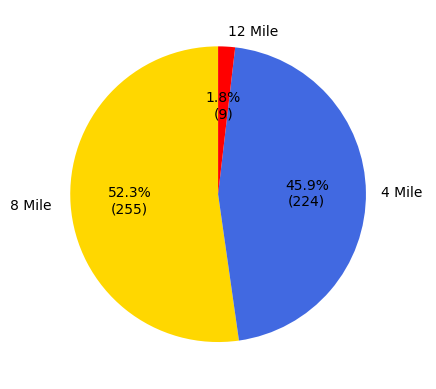

In [16]:
# Create the dataframe from a series and filter it to only the 3 main rental trips
piedf = pd.DataFrame({'Activity':activity_counts.index, 'Count':activity_counts.values})
# piedf_selected = piedf[piedf['Activity'].str.contains("Mile Self-Guided Trip")]

# function to display values with count and percentage
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues) + .5)
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plotting the pie chart using the DataFrame
colors = ['Gold', 'royalblue', 'Red']
plt.pie(piedf['Count'], labels=piedf['Activity'].str.slice(0, 7), autopct=lambda pct: func(pct, piedf['Count']), startangle=90, colors=colors)

# Display the pie chart
plt.show()



## Type of Boat Popularity
#### What boats are most commonly rented?

Function to calculate the number of boats rented.

In [17]:
def get_boat_count(boat_type):
  boats = (
    main_trip_unique_bookings['Tickets / Items']
    .value_counts()
    .loc[lambda x: x.index.str.contains(boat_type)]
    .reset_index()
  )

  boats['Size'] = boats['Tickets / Items'].apply(lambda x: int(x[:x.find('x')]))
  boats['Boats'] = boats['count'] * boats['Size']

  sum = boats['Boats'].sum()

  return sum

Display the number of rentals per boat.

In [18]:
boat_types = ['Single Kayak', 'Tandem', 'Canoe', 'Paddleboard', 'Bring']
boat_counts = []

for boat in boat_types:
  print(f"{boat}: {get_boat_count(boat)}")
  boat_counts.append(get_boat_count(boat) + 0.5)

Single Kayak: 586
Tandem: 121
Canoe: 48
Paddleboard: 36
Bring: 107


Pie chart of boat type popularity

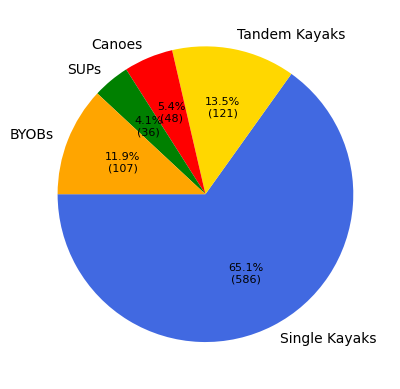

In [19]:
# Pie Chart (Does not include canceled bookings)
data = {
    'Boat': ['Single Kayaks', 'Tandem Kayaks', 'Canoes', 'SUPs', 'BYOBs'],
    'Count': boat_counts
        }

df_boat_counts = pd.DataFrame(data)

# function to display values
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plotting the pie chart using the DataFrame
colors = ['Royalblue', 'Gold', 'Red', 'Green', 'Orange']
wedges, texts, autotexts = plt.pie(df_boat_counts['Count'], labels=df_boat_counts['Boat'], autopct=lambda pct: func(pct, df_boat_counts['Count']), startangle=180, colors=colors)

for autotext in autotexts:
    autotext.set_fontsize(8)

# Display the pie chart
plt.show()



## Day of Week Popularity
#### What days of the week are most popular?


Number of bookings for each day of the week. Eliminate Mondays and Tuesdays because we are closed on those days.

In [20]:
#
day_counts = (
    main_trip_unique_bookings[~main_trip_unique_bookings['Day Of Week Number'].isin([0, 1])]
    .value_counts('Day Of Week Number')
)

day_counts

,count
Day Of Week Number,
5,177
6,177
4,49
3,44
2,22


Bar graph for number of bookings per day.

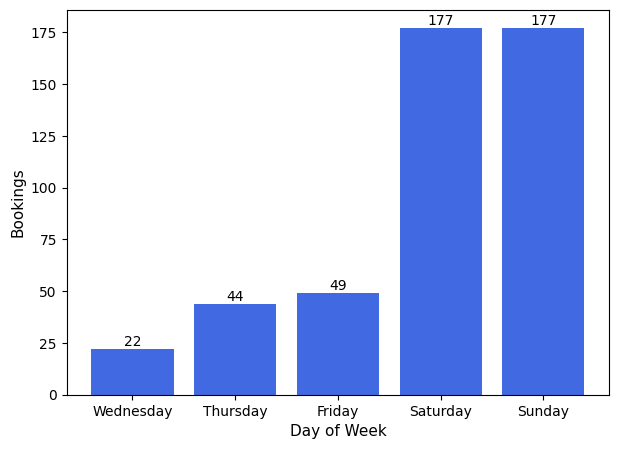

In [21]:
# Series to dataframe
day_counts_df = (
    day_counts.reset_index()
    .rename(columns={"Day Of Week Number": "Day", 'count': "Count"})
    .sort_values(by='Day', inplace=False)
)

# Create bar plot
x = day_counts_df['Day']
y = day_counts_df['Count']

plt.figure(figsize=(7, 5))
graph = plt.bar(x, y, color='royalblue')

# Set labels and title
xtick_labels = ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=x, labels=xtick_labels)

plt.xlabel('Day of Week', fontsize=11)
plt.ylabel('Bookings', fontsize=11)

# Add values on top of bars
for bar in graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show plot
plt.show()

Revenue for each day of week.

In [22]:
day_revenues = (
    main_trip_unique_bookings[~main_trip_unique_bookings['Day Of Week Number'].isin([0, 1])]
    .groupby(['Day Of Week Number'], as_index=False)['Your Net Revenue']
    .sum()
    .rename(columns={"Day Of Week Number": "Day", 'Your Net Revenue': "Revenue"})
)

day_revenues


,Day,Revenue
0,2,1046.04
1,3,3397.08
2,4,2426.90
3,5,12865.35
4,6,10464.56


Bar graph of revenue for each day.

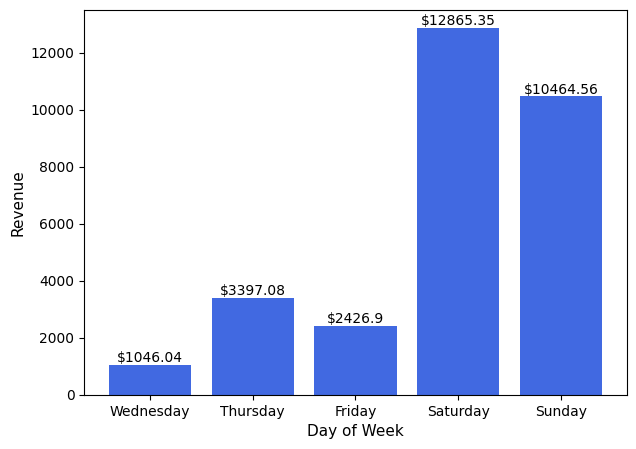

In [23]:
# Create bar plot
x = day_revenues['Day']
y = day_revenues['Revenue']

plt.figure(figsize=(7, 5))
graph = plt.bar(x, y, color='royalblue')

# Set labels and title
xtick_labels = ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.xticks(ticks=x, labels=xtick_labels)
plt.xlabel('Day of Week', fontsize=11)
plt.ylabel('Revenue', fontsize=11)

# Add values on top of bars
for bar in graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '$'+ str(yval), ha='center', va='bottom')

# Show plot
plt.show()

## Day-Time Slot Popularity
#### Broken down by day of the week, which times are most popular?

Number of bookings for each time slot.

In [24]:
time_counts = (
    main_trip_unique_bookings.value_counts('Activity Time')
    .reset_index()
    .rename(columns={"Activity Time": "Time", 'count': "Total Bookings"})
)

time_counts

,Time,Total Bookings
0,9:00am,108
1,10:00am,100
2,11:00am,97
3,12:00pm,75
4,1:00pm,62
5,2:00pm,46


Number of bookings for each time slot on weekends. Weekends are the most busy days so we will focus on those days.

In [25]:
weekend_time_counts = (
    main_trip_unique_bookings[main_trip_unique_bookings['Day Of Week']
    .str.contains('Saturday|Sunday', regex=True)]
    .value_counts('Activity Time')
    .reset_index()
    .rename(columns={"Activity Time": "Time", 'count': "Weekend Bookings"})
)

weekend_time_counts

,Time,Weekend Bookings
0,11:00am,75
1,9:00am,68
2,10:00am,64
3,12:00pm,58
4,1:00pm,51
5,2:00pm,38


Grouped bar graph of booking counts by time slot.

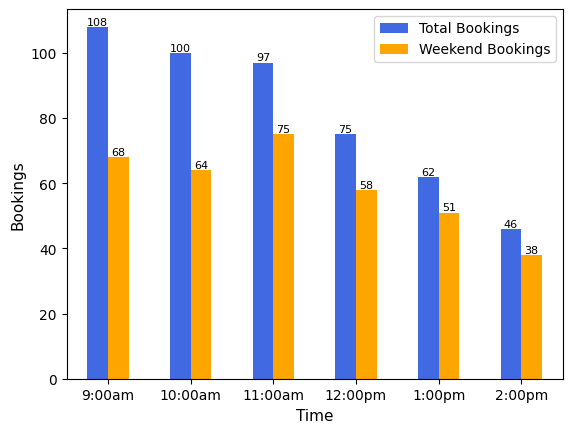

In [26]:
# Join total and weekend counts
combined = time_counts.set_index('Time').join(weekend_time_counts.set_index('Time'))

# Create bar plot
x = combined.index
full_week = combined['Total Bookings']
weekend = combined['Weekend Bookings']

ax = combined.plot(use_index=True, kind='bar', stacked=False, color=['royalblue', 'orange'])

# Labels
plt.xlabel('Time', fontsize=11)
plt.ylabel('Bookings', fontsize=11)
plt.xticks(rotation=0)

# Label bars with values
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

Find the number of bookings for each time slot of each day.

In [27]:
# Group by multiple columns and count the occurrences
day_time_grouped = (
    main_trip_unique_bookings[~main_trip_unique_bookings['Day Of Week'].str.contains('Monday')]
    .groupby(['Day Of Week', 'Activity Time'])
    .size()
    .reset_index(name='Slot_Count')
)

# Display the result
print(day_time_grouped.sort_values(by=['Day Of Week', 'Slot_Count'], ascending=False))


   Day Of Week Activity Time  Slot_Count
26   Wednesday        9:00am           9
23   Wednesday       10:00am           8
25   Wednesday        1:00pm           3
24   Wednesday       11:00am           2
17    Thursday       10:00am          11
22    Thursday        9:00am          11
18    Thursday       11:00am           8
21    Thursday        2:00pm           8
20    Thursday        1:00pm           5
19    Thursday       12:00pm           1
12      Sunday       11:00am          38
16      Sunday        9:00am          37
11      Sunday       10:00am          29
13      Sunday       12:00pm          27
14      Sunday        1:00pm          26
15      Sunday        2:00pm          20
6     Saturday       11:00am          37
5     Saturday       10:00am          35
7     Saturday       12:00pm          31
10    Saturday        9:00am          31
8     Saturday        1:00pm          25
9     Saturday        2:00pm          18
4       Friday        9:00am          18
0       Friday  

Find how many days the shop was open to use for mean calculations.

In [28]:
# Number of days open per day of week
day_open_counts = (
    main_trip_unique_bookings.groupby('Day Of Week')['Activity Date']
    .nunique()
    .reset_index(name='Day_Count')
    .rename(columns={'Day Of Week': 'Day'})
)

day_open_counts


,Day,Day_Count
0,Friday,13
1,Monday,1
2,Saturday,16
3,Sunday,16
4,Thursday,6
5,Wednesday,8


Find the average bookings for each time slot of each day.

In [29]:
# Merge day_time_grouped with day_open_counts to avoid lookup in apply
day_time_grouped = day_time_grouped.merge(day_open_counts, left_on='Day Of Week', right_on='Day')

# Calculate average bookings directly
day_time_grouped['Avg Bookings'] = day_time_grouped['Slot_Count'] / day_time_grouped['Day_Count']

# Sort the results
day_time_grouped = day_time_grouped.sort_values('Avg Bookings', ascending=False)

day_time_grouped

,Day Of Week,Activity Time,Slot_Count,Day,Day_Count,Avg Bookings
12,Sunday,11:00am,38,Sunday,16,2.375000
16,Sunday,9:00am,37,Sunday,16,2.312500
6,Saturday,11:00am,37,Saturday,16,2.312500
5,Saturday,10:00am,35,Saturday,16,2.187500
7,Saturday,12:00pm,31,Saturday,16,1.937500
10,Saturday,9:00am,31,Saturday,16,1.937500
22,Thursday,9:00am,11,Thursday,6,1.833333
17,Thursday,10:00am,11,Thursday,6,1.833333
11,Sunday,10:00am,29,Sunday,16,1.812500
13,Sunday,12:00pm,27,Sunday,16,1.687500


Bar graph of the number of bookings for each time slot of each day.

<BarContainer object of 27 artists>

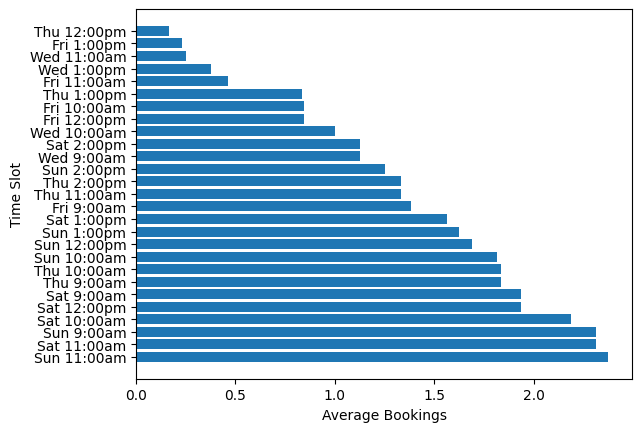

In [30]:
# Plot above
day_time_grouped['Day Time'] = day_time_grouped['Day Of Week'].str[0:3] + ' ' + day_time_grouped['Activity Time']
day_time_grouped.sort_values('Avg Bookings', inplace=True, ascending=False)

# Data
x = day_time_grouped['Day Time']
y = day_time_grouped['Avg Bookings']

# Customize
plt.xticks()
plt.xlabel('Average Bookings')
plt.ylabel('Time Slot')

plt.barh(x, y)



## Bookings by Week

Number of bookings for each week of the season.

In [31]:
# Weekly counts
week_number_counts = (
    main_trip_unique_bookings[~main_trip_unique_bookings['Day Of Week'].isin(['Monday', 'Tuesday'])]
    .assign(WeekNumber=lambda df: df['Activity Date'].dt.isocalendar().week)
    .groupby('WeekNumber')['Status']
    .count()
    .reset_index(name='Count')
)

week_number_counts

,WeekNumber,Count
0,20,18
1,21,39
2,22,28
3,23,18
4,24,7
5,25,19
6,26,13
7,27,66
8,28,27
9,29,31


Get the dates of each week. The date marks the Monday of the given week.

In [55]:
import datetime

start_date = pd.to_datetime('2024-05-13')
dates_by_week = {week: start_date + datetime.timedelta(weeks=week-20) for week in range(20, 39)}

Match the dates to the week numbers.

In [56]:
week_number_counts['WeekStart'] = week_number_counts['WeekNumber'].apply(lambda num: dates_by_week[num])

Bar graph of the number of bookings for each week.

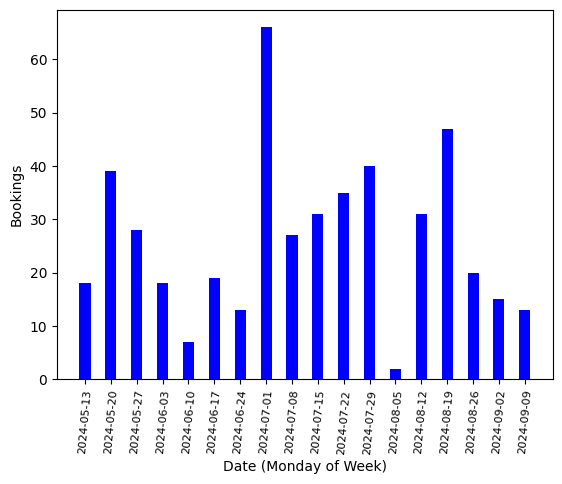

In [34]:
# Plot
plt.bar(week_number_counts['WeekStart'], week_number_counts['Count'], color='b', linestyle='-', label='line', width=3)

plt.xlabel("Date (Monday of Week)")
plt.ylabel("Bookings")

plt.xticks(week_number_counts['WeekStart'], rotation=85, fontsize=8)

plt.show()

## Memberships
#### Should we change the price of yearly memberships?

Teri Kropp

In [35]:
teri = df[df['First Name'] == 'Teri']

In [36]:
teri['Discount'].sum()

-2170.0

Kristina Eady

In [37]:
eady = df[(df['First Name'] == 'Kristina') & (df['Last Name'] == 'Eady')]

In [38]:
eady['Discount'].sum()

-2590.0

Linda Vondercrone

In [39]:
linda = df[(df['First Name'] == 'Linda') & (df['Last Name'] == 'Vondercrone')]

In [40]:
linda['Discount'].sum()

-860.0

## GROUP Discount

Find all bookings that used GROUP discount.

In [41]:
main_trip_unique_bookings[main_trip_unique_bookings['Promotion Code'] == 'GROUP']

,Booking ID,Status,Activity / Add-On,First Name,Last Name,Tickets / Items,Purchase Date,Activity Date,Activity Time,Promotion Code,...,Customer Fees,Total,Payable To You,Your Net Revenue,Notes,Payout Date,Payout Transaction ID,Full Name,Day Of Week,Day Of Week Number
339,B-XPK47MR,fulfilled,8 Mile Self-Guided Trip,Stephen,Kassab,"1x Tandem Kayak (two person, 430lb limit) - up...",2024-05-21,2024-05-25,10:00am,GROUP,...,9.00,85.50,81.44,76.85,NaN,5/27/2024,po_1PJswtQ627RfRlFO9WKtsxXb,stephen kassab,Saturday,5
341,B-XPK47MR,fulfilled,8 Mile Self-Guided Trip,Stephen,Kassab,2x Single Kayak - up to four hours,2024-05-21,2024-05-25,10:00am,GROUP,...,10.58,100.58,95.80,90.40,NaN,5/27/2024,po_1PJswtQ627RfRlFO9WKtsxXb,stephen kassab,Saturday,5
489,B-7P8XXZG,fulfilled,8 Mile Self-Guided Trip,David,Casillo,2x Bring your own boat - up to four hours,2024-05-30,2024-06-01,11:00am,GROUP,...,3.20,30.20,28.74,27.12,NaN,6/3/2024,po_1PNVlnQ627RfRlFOlHa8Msjy,david casillo,Saturday,5
490,B-7P8XXZG,fulfilled,8 Mile Self-Guided Trip,David,Casillo,"1x Tandem Kayak (two person, 430lb limit) - up...",2024-05-30,2024-06-01,11:00am,GROUP,...,9.08,85.58,81.44,76.85,NaN,6/3/2024,po_1PNVlnQ627RfRlFOlHa8Msjy,david casillo,Saturday,5
529,B-9JYWD8D,fulfilled,8 Mile Self-Guided Trip,Dominick,Faust,"2x Tandem Kayak (two person, 430lb limit) - up...",2024-06-01,2024-06-02,10:00am,GROUP,...,17.95,170.95,162.87,153.69,NaN,6/6/2024,po_1POEpGQ627RfRlFOQOvWDvWn,dominick faust,Sunday,6
530,B-9JYWD8D,fulfilled,8 Mile Self-Guided Trip,Dominick,Faust,1x Single Kayak - up to four hours,2024-06-01,2024-06-02,10:00am,GROUP,...,5.28,50.28,47.91,45.21,NaN,6/6/2024,po_1POEpGQ627RfRlFOQOvWDvWn,dominick faust,Sunday,6
660,B-PXV3D39,fulfilled,4 Mile Self-Guided Trip,Noah,Phillips,3x Single Kayak - 4 Hours,2024-06-08,2024-06-08,12:00pm,GROUP,...,9.48,117.48,111.71,105.23,NaN,6/12/2024,po_1PQmCAQ627RfRlFOGwAbsnTE,noah phillips,Saturday,5
718,B-A9KY769,fulfilled,8 Mile Self-Guided Trip,Susan,Zigner-Steiger,3x Single Kayak - up to four hours,2024-06-10,2024-06-14,10:00am,GROUP,...,15.93,150.93,143.71,135.61,NaN,6/12/2024,po_1PQmCAQ627RfRlFOGwAbsnTE,susan zigner-steiger,Friday,4
743,B-EWG67PX,fulfilled,4 Mile Self-Guided Trip,Jennifer,Campos,4x Single Kayak - 4 Hours,2024-06-22,2024-06-23,9:00am,GROUP,...,12.54,156.54,148.95,140.31,NaN,6/26/2024,po_1PVqtFQ627RfRlFOZMB18Hv6,jennifer campos,Sunday,6
947,B-EWZ7MPP,fulfilled,4 Mile Self-Guided Trip,Shayla,Jordan,3x Single Kayak - 4 Hours,2024-07-03,2024-07-04,2:00pm,GROUP,...,9.48,117.48,111.71,105.23,NaN,7/9/2024,po_1PaZ3MQ627RfRlFOP8jg3Exa,shayla jordan,Thursday,3


## Wednesday Night Paddle
#### What can we take away from this weekly paddle event?

Filter bookings to exclusively Wednesday Night Paddle bookings.

In [42]:
wed_night_paddle_bookings = df[df['Activity / Add-On'] == 'WEDNESDAY NIGHT PADDLE']

Total Revenue from Wednesday Night Paddles:

In [43]:
wed_night_paddle_bookings['Your Net Revenue'].sum()

2287.08

Eliminate the cancelled bookings in the wednesday night paddle bookings dataframe.

In [44]:
wed_night_paddle_bookings = wed_night_paddle_bookings[wed_night_paddle_bookings['Status'] != 'canceled']

Number of Wednesday Night Paddle bookings (non-cancelled):

In [45]:
wed_night_paddle_bookings['Activity Date'].size

235

Wednesday Night Paddles number of bookings per week:

In [46]:
wed_night_paddle_bookings['Activity Date'].value_counts()

,count
Activity Date,
2024-07-10,27
2024-08-14,23
2024-08-21,21
2024-05-08,20
2024-06-12,18
2024-07-03,18
2024-05-01,17
2024-05-22,17
2024-07-31,17


Count of unique individuals who attended a Wednesday Night Paddle

In [47]:
wed_night_paddle_bookings[['First Name', 'Last Name']].drop_duplicates()['First Name'].size

71

## Popularity by Month
#### What months are most popular over the past two years?

Stakeholder wants to look at monthly data from 2023 and 2024, so we need to clean 2023 data before use.

In [48]:
# Make date time columns
df23['Purchase Date'] = pd.to_datetime(df23['Purchase Date'])
df23['Activity Date'] = pd.to_datetime(df23['Activity Date'])

In [49]:
# Make dataframe without cancellations
df23_no_cancels = df23[df23['Status'] != "canceled"]

In [50]:
# Make dataframe with no repeated rental bookings and no cancels
unique_columns = ['Booking ID', 'First Name', 'Last Name', 'Tickets / Items', 'Activity Date']
main_trip_unique_bookings23 = (
    df23_no_cancels[df23_no_cancels['Activity / Add-On'].str.contains("Mile Self-Guided Trip")]
    .loc[~df23_no_cancels['Tickets / Items'].str.contains('Person|Refund', regex=True)]
    .drop_duplicates(subset=unique_columns)
)

Make a group bar chart of the number of bookings for each month.

In [51]:
unique_bookings_23_24 = pd.concat([main_trip_unique_bookings, main_trip_unique_bookings23], ignore_index=True)

Create a new dataframe with the number of bookings for each month of each year.

In [52]:
unique_bookings_23_24['Month'] = unique_bookings_23_24['Activity Date'].dt.month
unique_bookings_23_24['Year'] = unique_bookings_23_24['Activity Date'].dt.year


month_counts = (unique_bookings_23_24[['Month', 'Year']]).value_counts().reset_index().sort_values(by=['Year', 'Month'])

Plot the value counts on a grouped bar chart.

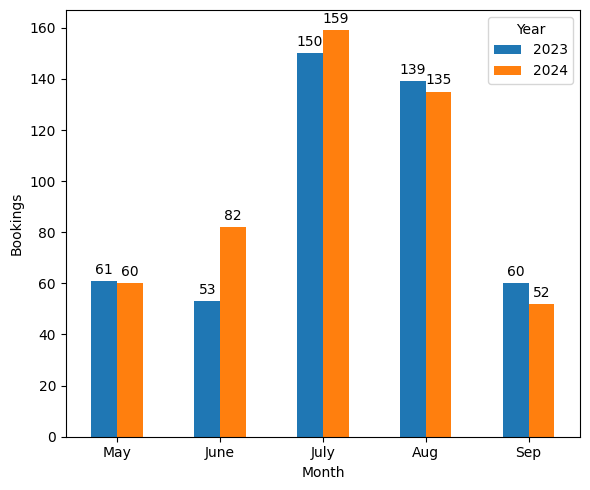

In [53]:
# Pivot and plot the dataframe
ax = month_counts.pivot(index='Month', columns='Year', values='count').plot(kind='bar', figsize=(6, 5), width=0.5)

# Customize x-ticks and labels
ax.set_xlabel('Month')
ax.set_ylabel('Bookings')
ax.set_xticklabels(['May', 'June', 'July', 'Aug', 'Sep'], rotation=0)

# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

# Final adjustments and show plot
plt.tight_layout()
plt.show()